In [0]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [0]:
#to assess clustering tendency, we can use Hopkin's index

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print (ujd, wjd)
        H = 0
 
    return H

In [0]:
data= boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [0]:
hopkins(data)

AttributeError: ignored

In [0]:
import numpy as np
import pylab as pl
from sklearn.cluster import KMeans 
from sklearn.datasets import load_boston
boston = load_boston()

In [0]:

set_printoptions(suppress=True, precision=2, linewidth=120)

NameError: ignored

In [0]:

x = np.array([np.concatenate((boston.data[i],[boston.target[i]])) for i in range(len(boston.data))])

In [0]:

kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1) # initialization

In [0]:
kmeans.fit(x)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1518124.7908196128
start iteration
done sorting
end inner loop
Iteration 1, inertia 1503181.1245550779
start iteration
done sorting
end inner loop
Iteration 2, inertia 1501594.409563167
start iteration
done sorting
end inner loop
Iteration 3, inertia 1501594.409563167
center shift 0.000000e+00 within tolerance 2.738716e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1493709.3486182606
start iteration
done sorting
end inner loop
Iteration 1, inertia 1477841.7944148346
start iteration
done sorting
end inner loop
Iteration 2, inertia 1475769.8354326247
start iteration
done sorting
end inner loop
Iteration 3, inertia 1475612.321081655
start iteration
done sorting
end inner loop
Iteration 4, inertia 1475612.321081655
center shift 0.000000e+00 within tolerance 2.738716e-01
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [0]:
clusters = kmeans.predict(x)

In [0]:
print (clusters)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 3 3 0
 0 0 0 0 0 3 0 3 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 2 0 0 2 2 2 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 4 4 4 4 4 4 4 4 4 4 4 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1
 1 4 1 1 1 1 4 1 1 1 4 4 4 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [0]:
print (kmeans.cluster_centers_)

[[ 6.25125773e-01  1.21649485e+01  1.21341237e+01  6.18556701e-02
   5.63742268e-01  6.20039175e+00  6.97989691e+01  3.60003711e+00
   4.76288660e+00  4.02865979e+02  1.77927835e+01  3.82109794e+02
   1.22714433e+01  2.25505155e+01]
 [ 1.09105113e+01  5.32907052e-15  1.85725490e+01  7.84313725e-02
   6.71225490e-01  5.98226471e+00  8.99137255e+01  2.07716373e+00
   2.30196078e+01  6.68205882e+02  2.01950980e+01  3.71803039e+02
   1.78740196e+01  1.74294118e+01]
 [ 2.34579655e-01  1.75095785e+01  6.69160920e+00  7.66283525e-02
   4.84305364e-01  6.47762069e+00  5.59111111e+01  4.84316092e+00
   4.32950192e+00  2.74969349e+02  1.78494253e+01  3.88800958e+02
   9.44203065e+00  2.60448276e+01]
 [ 1.96320727e+00  1.77635684e-15  1.67081818e+01  9.09090909e-02
   7.07727273e-01  5.91609091e+00  9.18181818e+01  2.32369091e+00
   4.72727273e+00  3.86909091e+02  1.70000000e+01  1.87546364e+02
   1.72127273e+01  1.70181818e+01]
 [ 1.63460857e+01 -5.32907052e-15  1.81000000e+01  1.38777878e-17
  

In [0]:
pl.plot(data[clusters==1,0],data[clusters==1,2],'ro')
pl.plot(data[clusters==0,0],data[clusters==0,2],'bo')
pl.plot(data[clusters==2,0],data[clusters==2,2],'go')
pl.show()

TypeError: ignored

Text(0.5, 0.92, 'K Means')

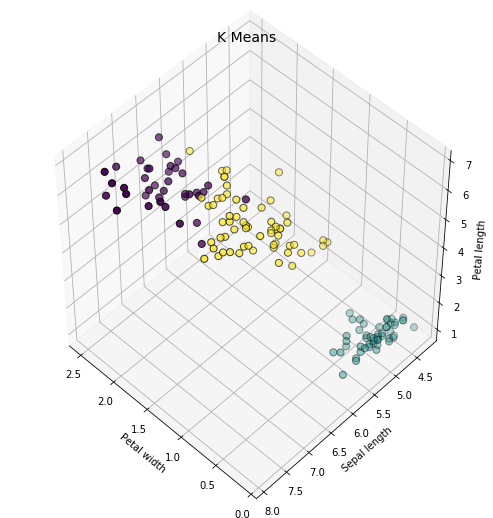

In [0]:
#for iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
#Iris Dataset
iris = datasets.load_iris()
X = iris.data
#KMeans
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X[:, 3], X[:, 0], X[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=14)


In [0]:
from hmmlearn import hmm
import numpy as np
%matplotlib inline
from sklearn import datasets
#Data
boston = datasets.load_boston()
ts_data = boston.data[1,:]
#HMM Model
gm = hmm.GaussianHMM(n_components=3)
gm.fit(ts_data.reshape(-1, 1))
states = gm.predict(ts_data.reshape(-1, 1))
#Plot
color_dict = {0:"r",1:"g",2:"b"}
color_array = [color_dict[i] for i in states]
plt.scatter(range(len(ts_data)), ts_data, c=color_array)
plt.title("HMM Model")

ModuleNotFoundError: ignored

In [0]:
import pandas as pd
data= boston_housing.load_data()
df=pd.DataFrame(data)

TypeError: ignored

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [33]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(data)
labels = model.labels_

ValueError: ignored

In [35]:
data=pd.DataFrame(data)

TypeError: ignored